### Import required libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Set seaborn style for better visuals

In [6]:
sns.set_theme(style="whitegrid")

### Load the dataset

In [9]:
file_path = "Games.csv"
df = pd.read_csv(file_path)

### Convert 'Year_of_Release' to numeric for analysis

In [13]:
df["Year_of_Release"] = pd.to_numeric(df["Year_of_Release"], errors="coerce")

### Remove rows with missing or incorrect year values

In [16]:
df = df[df["Year_of_Release"].between(1980, 2020)]

### Temporal Patterns (Yearly Trends)

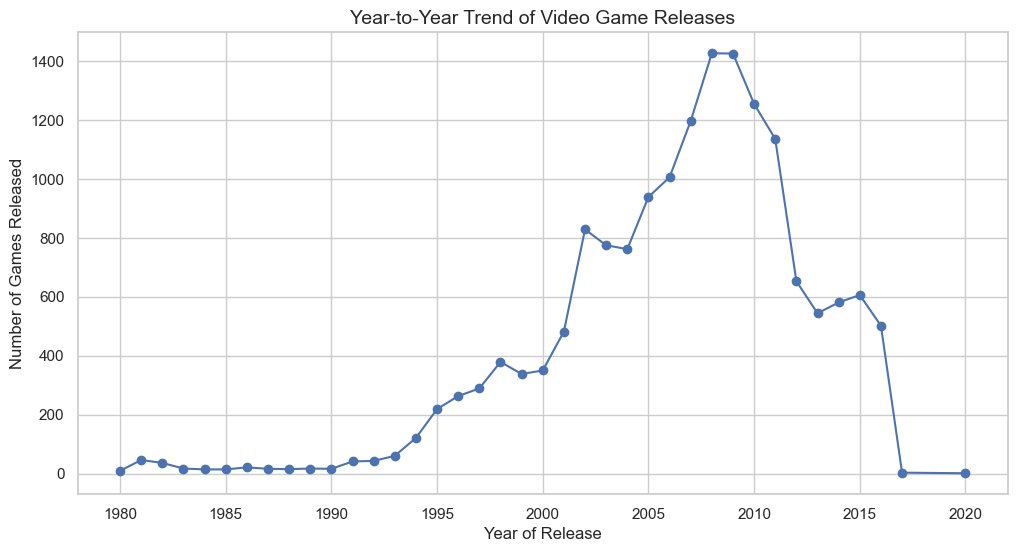

In [19]:
plt.figure(figsize=(12, 6))
yearly_releases = df.groupby("Year_of_Release")["Name"].count()
plt.plot(yearly_releases.index, yearly_releases.values, marker="o", color="b", linestyle="-")
plt.title("Year-to-Year Trend of Video Game Releases", fontsize=14)
plt.xlabel("Year of Release", fontsize=12)
plt.ylabel("Number of Games Released", fontsize=12)
plt.grid(True)
plt.show()

### Data Distribution (Machine Learning Perspective)

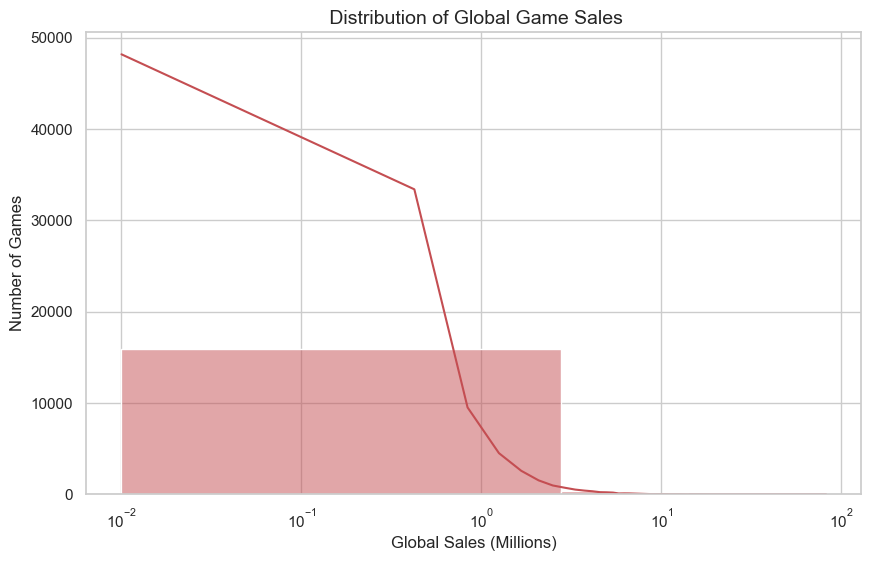

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Global_Sales"], bins=30, kde=True, color="r")
plt.xscale("log")
plt.title(" Distribution of Global Game Sales", fontsize=14)
plt.xlabel("Global Sales (Millions)", fontsize=12)
plt.ylabel("Number of Games", fontsize=12)
plt.grid(True)
plt.show()

### Supporting Story: Popular Genres Over Time

<Figure size 1200x600 with 0 Axes>

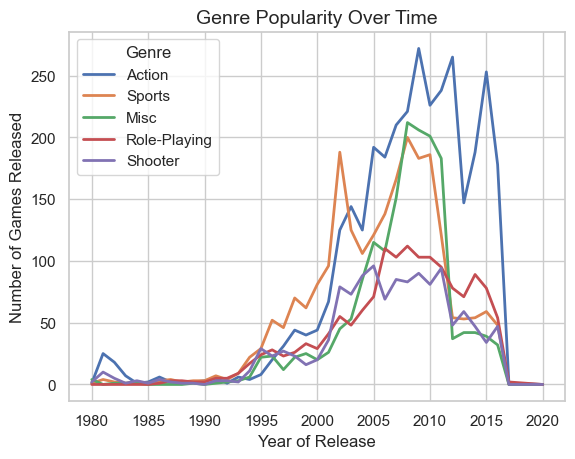

In [28]:
plt.figure(figsize=(12, 6))
genre_trend = df.groupby(["Year_of_Release", "Genre"]).size().unstack().fillna(0)
top_genres = df["Genre"].value_counts().head(5).index
top_genres_over_time = genre_trend[top_genres]
top_genres_over_time.plot(kind="line", linewidth=2)
plt.title("Genre Popularity Over Time", fontsize=14)
plt.xlabel("Year of Release", fontsize=12)
plt.ylabel("Number of Games Released", fontsize=12)
plt.legend(title="Genre")
plt.grid(True)
plt.show()

### Regional Sales Distribution

C:\Users\Madhan\AppData\Local\Temp\ipykernel_32408\446444349.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="coolwarm")


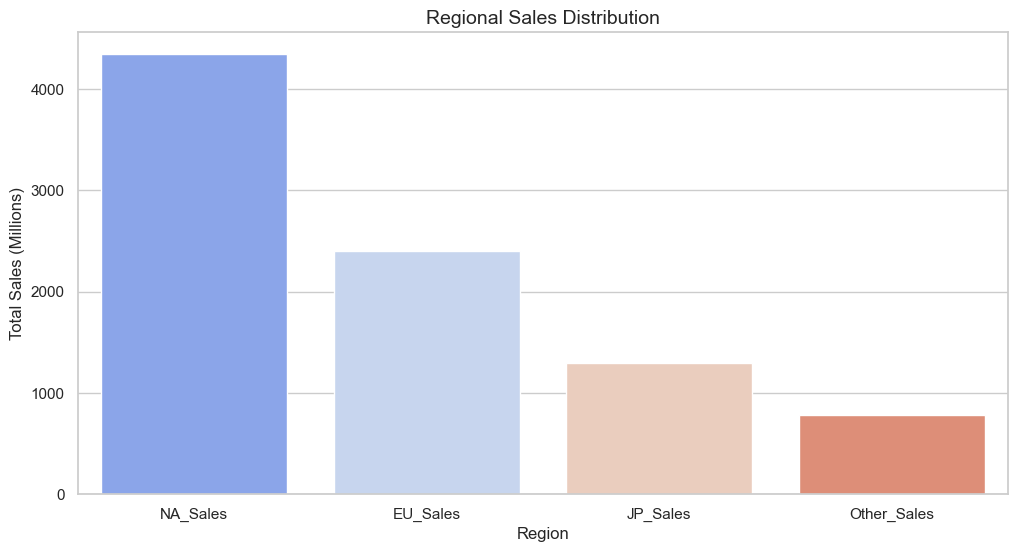

In [63]:
plt.figure(figsize=(12, 6))
region_sales = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()
sns.barplot(x=region_sales.index, y=region_sales.values, palette="coolwarm")
plt.title("Regional Sales Distribution", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Sales (Millions)", fontsize=12)
plt.show()

### Platform Dominance

C:\Users\Madhan\AppData\Local\Temp\ipykernel_32408\1034990864.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_platforms.index, x=top_platforms.values, palette="Blues_r")


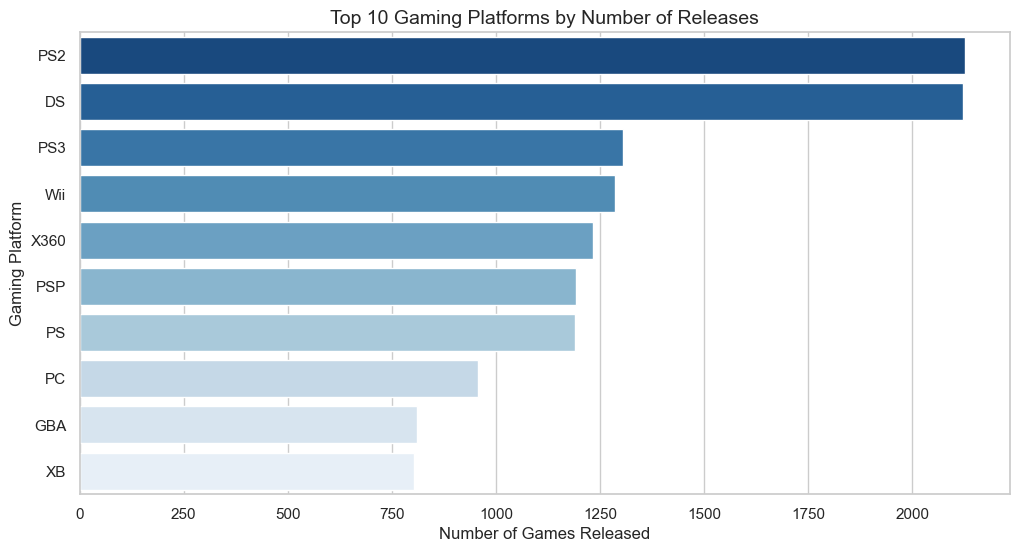

In [66]:
plt.figure(figsize=(12, 6))
top_platforms = df["Platform"].value_counts().head(10)
sns.barplot(y=top_platforms.index, x=top_platforms.values, palette="Blues_r")
plt.title("Top 10 Gaming Platforms by Number of Releases", fontsize=14)
plt.xlabel("Number of Games Released", fontsize=12)
plt.ylabel("Gaming Platform", fontsize=12)plt.show()

### Top Publishers

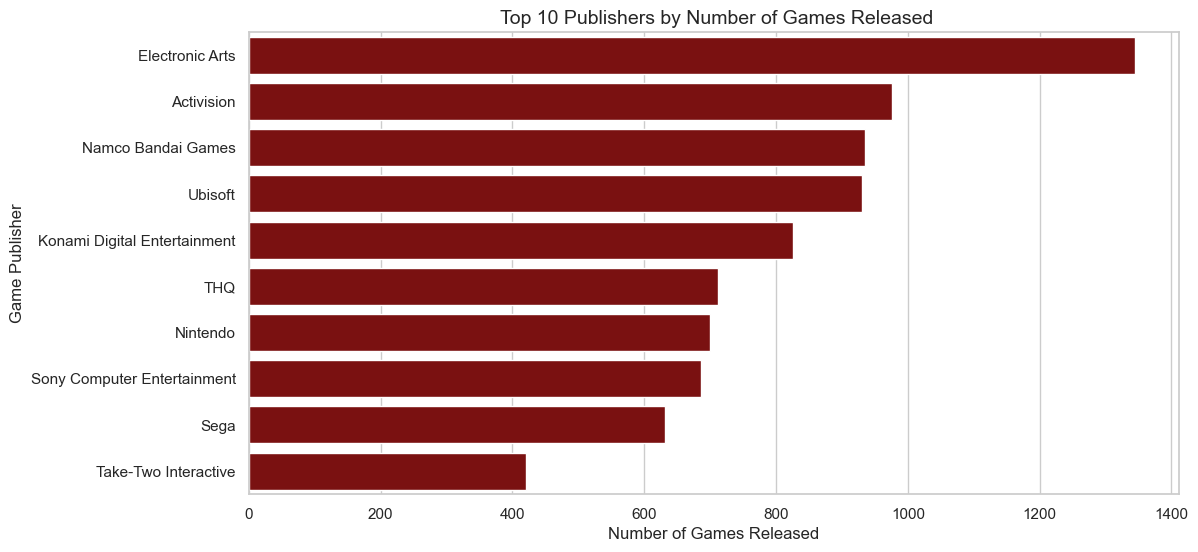

In [83]:
plt.figure(figsize=(12, 6))
top_publishers = df["Publisher"].value_counts().head(10)

publisher_df = top_publishers.reset_index()
publisher_df.columns = ["Publisher", "Number of Games"]

sns.barplot(data=publisher_df, y="Publisher", x="Number of Games", color="darkred")

plt.title(" Top 10 Publishers by Number of Games Released", fontsize=14)
plt.xlabel("Number of Games Released", fontsize=12)
plt.ylabel("Game Publisher", fontsize=12)

plt.show()


### Future Predection 

Available columns: Index(['Publisher', 'Year_of_Release', 'Critic_Score', 'User_Score',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales', 'Genre_Action',
       'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform',
       'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
       'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy', 'Platform_3DS',
       'Platform_DC', 'Platform_DS', 'Platform_GBA', 'Platform_GC',
       'Platform_PC', 'Platform_PS', 'Platform_PS2', 'Platform_PS3',
       'Platform_PS4', 'Platform_PSP', 'Platform_PSV', 'Platform_Wii',
       'Platform_WiiU', 'Platform_X360', 'Platform_XB', 'Platform_XOne'],
      dtype='object')
Correlation Matrix:
               Global_Sales  NA_Sales  EU_Sales  JP_Sales  Critic_Score  \
Global_Sales      1.000000  0.956055  0.939550  0.614417      0.245300   
NA_Sales          0.956055  1.000000  0.842493  0.470182      0.240058   
EU_Sales          0.939550  0.842493  1.000000  0.520843   

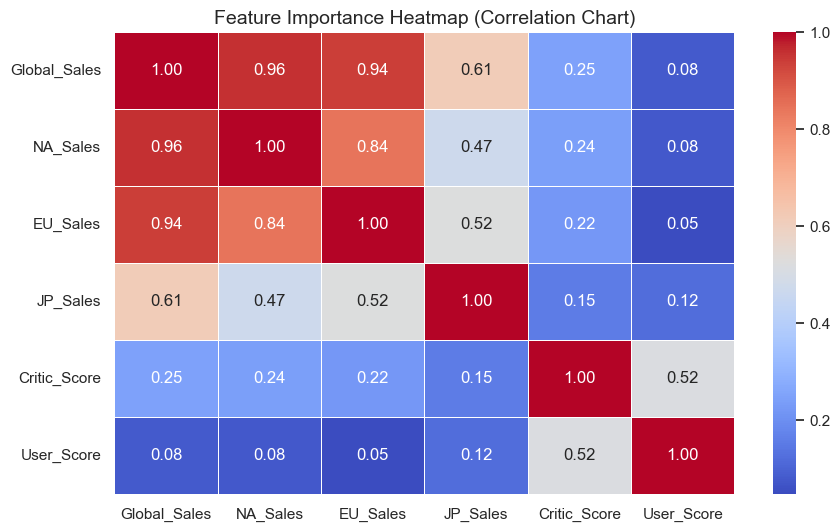

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


sns.set_theme(style="whitegrid")

print("Available columns:", df.columns)

correlation_features = [col for col in ["Global_Sales", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Critic_Score", "User_Score"] if col in df.columns]

if "Critic_Score" in df.columns and "User_Score" in df.columns:
    df[["Critic_Score", "User_Score"]] = df[["Critic_Score", "User_Score"]].replace("tbd", np.nan)

df[correlation_features] = df[correlation_features].apply(pd.to_numeric, errors="coerce")

df_filtered = df[correlation_features].dropna()

corr_matrix = df_filtered.corr()

print("Correlation Matrix:\n", corr_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Feature Importance Heatmap (Correlation Chart)", fontsize=14)

plt.show()
